# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data

In [5]:
path = 'advertising.csv'

df = pd.read_csv(path)

df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [8]:
df['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

In [9]:
np.percentile(df['Male'], 52)

1.0

# 1. Exploratory Data Analysis

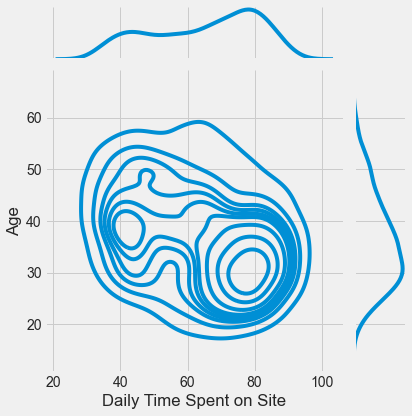

In [11]:
sns.jointplot(x= df['Daily Time Spent on Site'], y= df['Age'], kind='kde')

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [15]:
df['Timestamp_day'] = df['Timestamp'].dt.day
df['Timestamp_month'] = df['Timestamp'].dt.month
df['Timestamp_hour'] = df['Timestamp'].dt.hour
df['Timestamp_minutes'] = df['Timestamp'].dt.minute
df['Timestamp_weekday'] = df['Timestamp'].dt.weekday
df['Timestamp_noche'] = np.where(df['Timestamp_hour']<=8, 1 ,0)
df['Timestamp_diff_days'] = (df['Timestamp']-df['Timestamp'].min()).dt.days


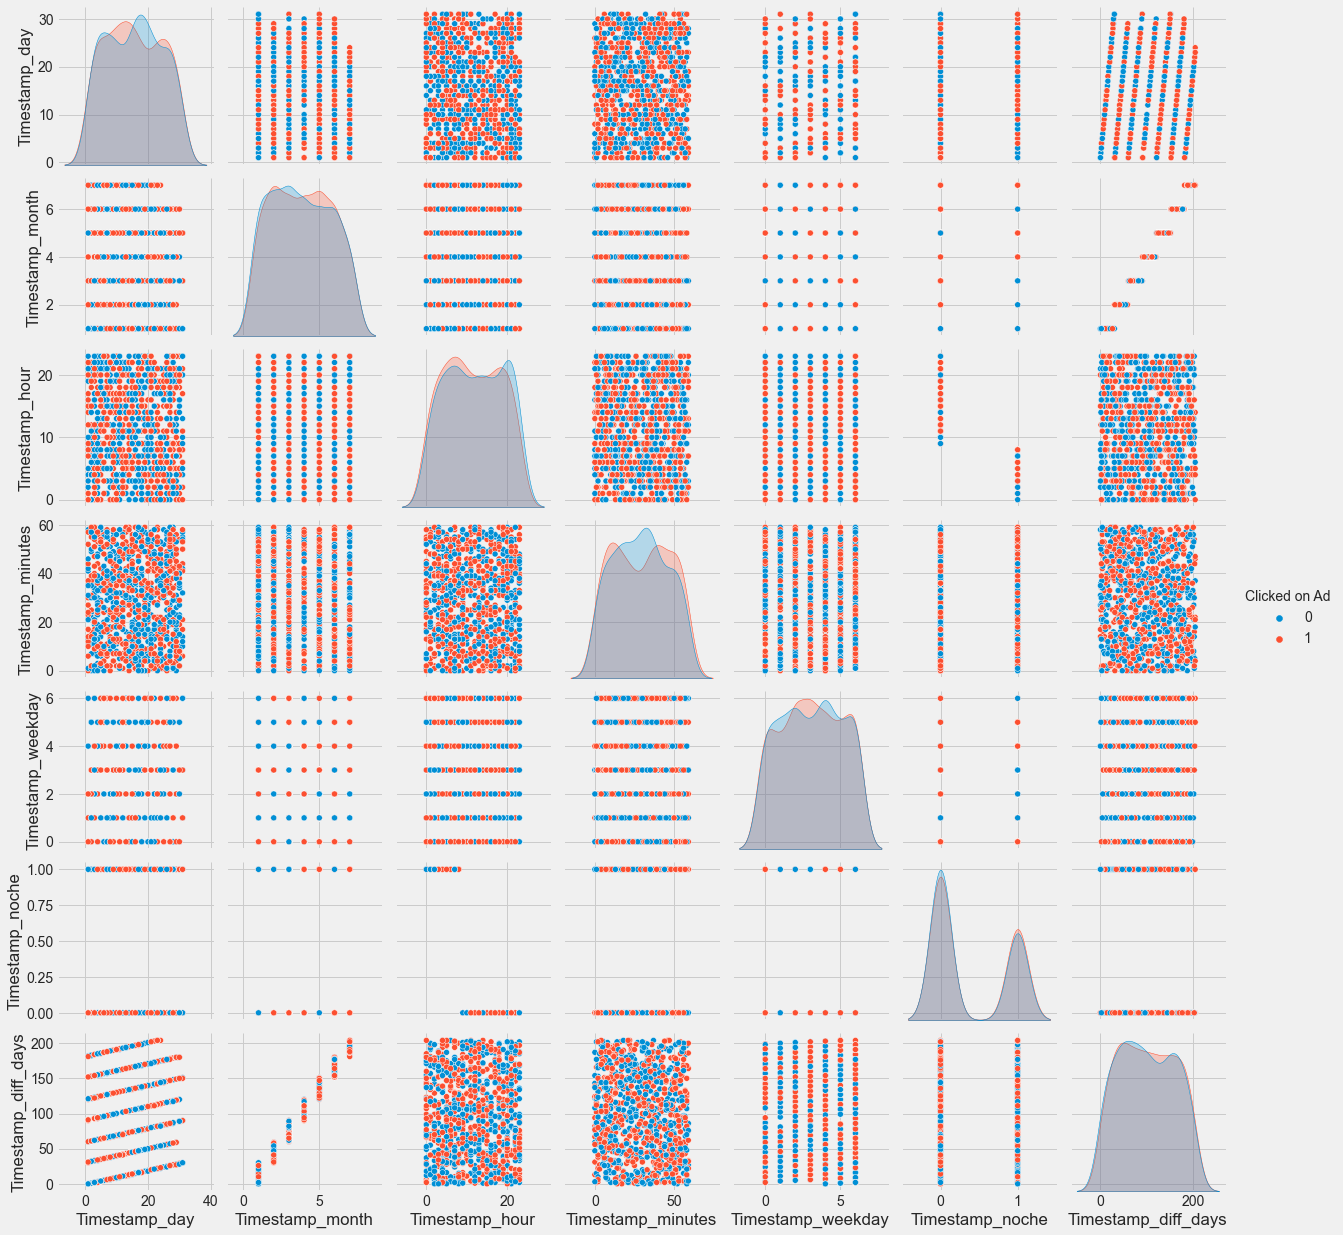

In [16]:
sns.pairplot(df[['Timestamp','Timestamp_day','Timestamp_month','Timestamp_hour','Timestamp_minutes','Timestamp_weekday','Timestamp_noche','Timestamp_diff_days','Clicked on Ad']], hue = 'Clicked on Ad')

<AxesSubplot:>

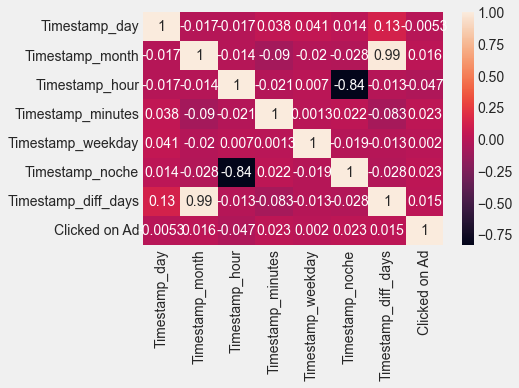

In [17]:
sns.heatmap(df[['Timestamp','Timestamp_day','Timestamp_month','Timestamp_hour','Timestamp_minutes','Timestamp_weekday','Timestamp_noche','Timestamp_diff_days','Clicked on Ad']].corr(), annot=True)

# 2. Prepare Data for Logistic Regression


In [18]:
df = df.drop(['Male'], axis=1)

In [19]:
df['City'].nunique()

969

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['City'])
df['City_le'] = le.transform(df['City'])

In [24]:
le.fit(df['Ad Topic Line'])
df['Ad Topic Line le'] = le.transform(df['Ad Topic Line'])

In [25]:
df[['Ad Topic Line','Ad Topic Line le']]

,Ad Topic Line,Ad Topic Line le
0,Cloned 5thgeneration orchestration,91
1,Monitored national standardization,464
2,Organic bottom-line service-desk,566
3,Triple-buffered reciprocal time-frame,903
4,Robust logistical utilization,766
...,...,...
995,Fundamental modular algorithm,345
996,Grass-roots cohesive monitoring,359
997,Expanded intangible solution,263
998,Proactive bandwidth-monitored policy,641


In [26]:
df[['Timestamp','Timestamp_day','Timestamp_month','Timestamp_hour','Timestamp_minutes','Timestamp_weekday','Timestamp_noche','Timestamp_diff_days']]

,Timestamp,Timestamp_day,Timestamp_month,Timestamp_hour,Timestamp_minutes,Timestamp_weekday,Timestamp_noche,Timestamp_diff_days
0,2016-03-27 00:53:11,27,3,0,53,6,1,85
1,2016-04-04 01:39:02,4,4,1,39,0,1,93
2,2016-03-13 20:35:42,13,3,20,35,6,0,72
3,2016-01-10 02:31:19,10,1,2,31,6,1,8
4,2016-06-03 03:36:18,3,6,3,36,4,1,154
...,...,...,...,...,...,...,...,...
995,2016-02-11 21:49:00,11,2,21,49,3,0,41
996,2016-04-22 02:07:01,22,4,2,7,4,1,111
997,2016-02-01 17:24:57,1,2,17,24,0,0,31
998,2016-03-24 02:35:54,24,3,2,35,3,1,82


In [18]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Country', 'Timestamp',
       'Clicked on Ad', 'Timestamp_day', 'Timestamp_month', 'Timestamp_hour',
       'Timestamp_minutes', 'Timestamp_weekday', 'Timestamp_noche',
       'Timestamp_diff_days', 'City_le', 'Ad Topic Line le'],
      dtype='object')


#### 1. Train test split


In [27]:
X = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]
y = df['Clicked on Ad']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
print(X['Daily Time Spent on Site'].max())
print(X['Daily Time Spent on Site'].min())

91.43
32.6


In [30]:
print(X_train['Daily Time Spent on Site'].max())
print(X_train['Daily Time Spent on Site'].min())

91.43
32.6


In [31]:
print(X_test['Daily Time Spent on Site'].max())
print(X_test['Daily Time Spent on Site'].min())

90.97
32.6



#### 2. StandardScaler()


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
scaler.inverse_transform(X_train)

array([[7.565000e+01, 3.900000e+01, 6.402155e+04, 2.479000e+02],
       [4.604000e+01, 3.200000e+01, 6.549993e+04, 1.479200e+02],
       [6.942000e+01, 2.500000e+01, 6.579117e+04, 2.133800e+02],
       ...,
       [9.137000e+01, 4.500000e+01, 5.192049e+04, 1.826500e+02],
       [5.666000e+01, 4.200000e+01, 7.268444e+04, 1.394200e+02],
       [8.991000e+01, 4.000000e+01, 5.959356e+04, 1.942300e+02]])

# 3. Implement Logistic Regression in Scikit-Learn and predict

0.9633333333333334
0.9798657718120806
0.948051948051948
0.9636963696369636
0.9637520014232343


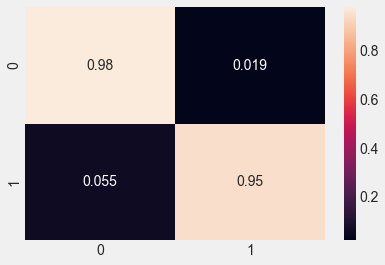

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

c_mat = confusion_matrix(y_test,y_pred)
c_mat

sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.9633333333333334
0.9798657718120806
0.948051948051948
0.9636963696369636
0.9637520014232343


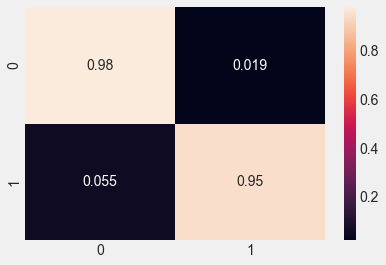

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression()

log_reg2.fit(X_train, y_train)

y_pred2 = log_reg2.predict(X_test)

sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test, y_pred2))
print(recall_score(y_test, y_pred2))
print(f1_score(y_test, y_pred2))
print(roc_auc_score(y_test, y_pred2))

In [28]:
from sklearn.model_selection import KFold, cross_val_score
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.95714286 1.         0.98571429 0.98571429 0.95714286 0.92857143
 0.97142857 0.95714286 0.98571429 0.97142857]
Logistic Regression: 0.970000 (0.019640)


# 4. Evaluate models



#### 1. Confusion Matrix


In [29]:
c_mat = confusion_matrix(y_test,y_pred)
c_mat

array([[143,   3],
       [  8, 146]], dtype=int64)

In [30]:
c_mat.sum(axis=1)

array([146, 154], dtype=int64)

In [31]:
c_mat/c_mat.sum(axis=1)

array([[0.97945205, 0.01948052],
       [0.05479452, 0.94805195]])

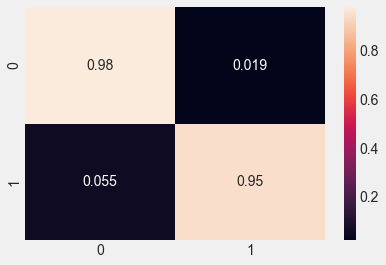

In [32]:
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);

In [33]:
accuracy_score(y_test,y_pred) # De todas las clasificaciones del predictor, cuántas son correctas

0.9633333333333334


#### 2. Precision


In [34]:
precision_score(y_test, y_pred)

0.9798657718120806

In [35]:
c_mat #TP/TP+FP De todos los 1s que he clasificado con mi predictor, cuántos son correctos

array([[143,   3],
       [  8, 146]], dtype=int64)

In [37]:
146/(146+3) # la matriz de confusión tiene por filas y por columnas 0 y 1

0.9798657718120806



#### 3. Recall


In [37]:
recall_score(y_test, y_pred)

0.948051948051948

In [38]:
c_mat #TP/TP+FN De todos los 1s reales, cuántos he clasificado correctamente

array([[143,   3],
       [  8, 146]], dtype=int64)

In [39]:
146/(146+8)

0.948051948051948



#### 4. F1 Score


In [40]:
f1_score(y_test, y_pred)

0.9636963696369636

In [41]:
c_mat #2*precision*recall/precision+recall

array([[143,   3],
       [  8, 146]], dtype=int64)

In [42]:
2*precision_score(y_test, y_pred)*recall_score(y_test, y_pred)/(precision_score(y_test, y_pred)+recall_score(y_test, y_pred))

0.9636963696369636



#### 5. ROC curve

In [43]:
roc_auc_score(y_test, y_pred)

0.9637520014232343

# 5. Conclusions

In [44]:
from sklearn.model_selection import KFold, cross_val_score
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.95714286 1.         0.98571429 0.98571429 0.95714286 0.92857143
 0.97142857 0.95714286 0.98571429 0.97142857]
Logistic Regression: 0.970000 (0.019640)


In [45]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Country', 'Timestamp',
       'Clicked on Ad', 'Timestamp_day', 'Timestamp_month', 'Timestamp_hour',
       'Timestamp_minutes', 'Timestamp_weekday', 'Timestamp_noche',
       'Timestamp_diff_days', 'City_le', 'Ad Topic Line le'],
      dtype='object')

In [46]:
X_new = pd.DataFrame({'Daily Time Spent on Site': [35],
                     'Age': [26],
                     'Area Income': [47031],
                     'Daily Internet Usage': [138]})
log_reg.predict(scaler.transform(X_new))

array([1], dtype=int64)